In [1]:
import pandas as pd 
from tools_ml import recursos_graficos as rg 
import os

In [2]:
os.chdir("..")
data_path = 'data/churn.csv'

df =  pd.read_csv(data_path)

df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [3]:
df.columns[-1]

'Exited'

In [3]:
df = df.drop(df.columns[0:3], axis=1)

df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# Analisis Univariable

Columna: CreditScore
CreditScore 
Minimum:350.00
Mean:650.53
Median:652.00
Mode:850.00
Maximum:850.00



c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


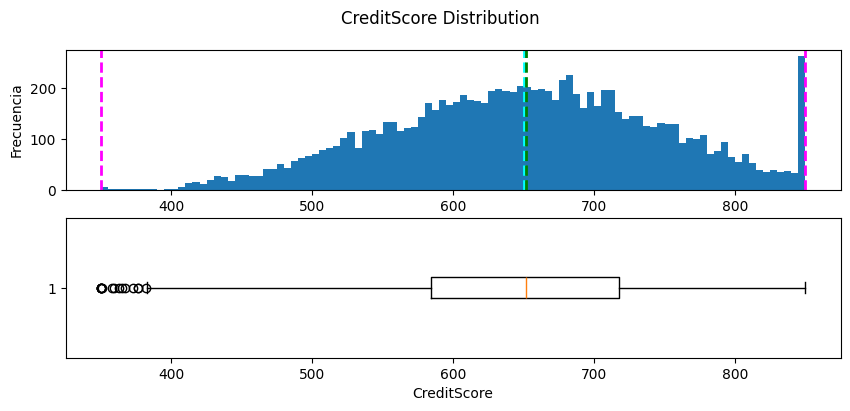

 
Columna: Geography


 
Columna: Gender


 
Columna: Age
Age 
Minimum:18.00
Mean:38.92
Median:37.00
Mode:37.00
Maximum:92.00



c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



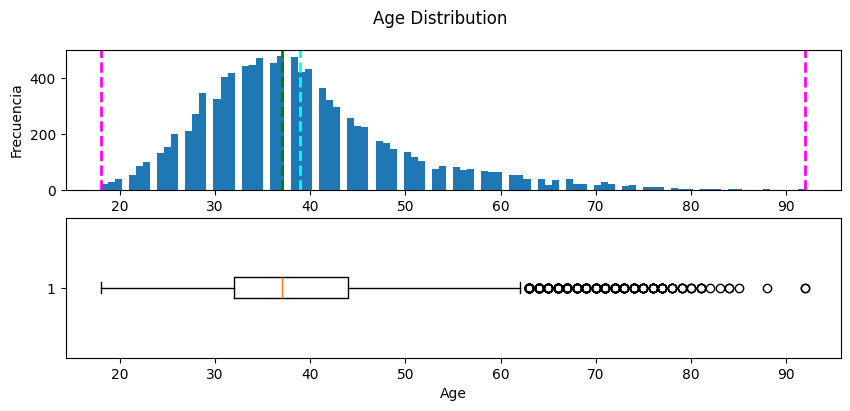

 
Columna: Tenure
Tenure 
Minimum:0.00
Mean:5.01
Median:5.00
Mode:2.00
Maximum:10.00



c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



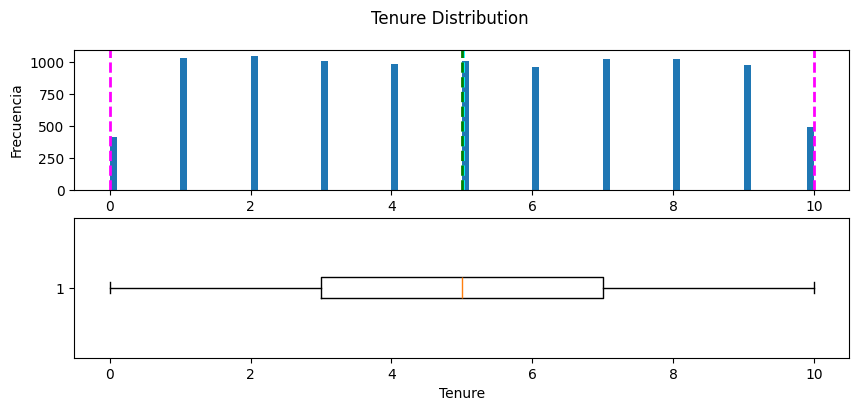

 
Columna: Balance
Balance 
Minimum:0.00
Mean:76485.89
Median:97198.54
Mode:0.00
Maximum:250898.09



c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



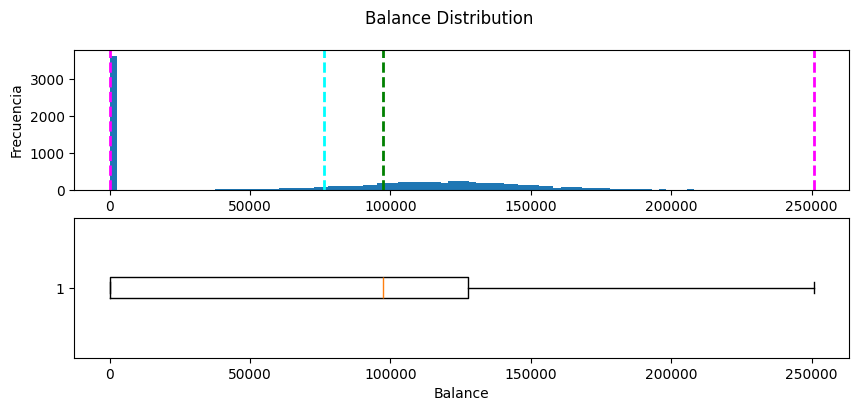

c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



 
Columna: NumOfProducts
NumOfProducts 
Minimum:1.00
Mean:1.53
Median:1.00
Mode:1.00
Maximum:4.00



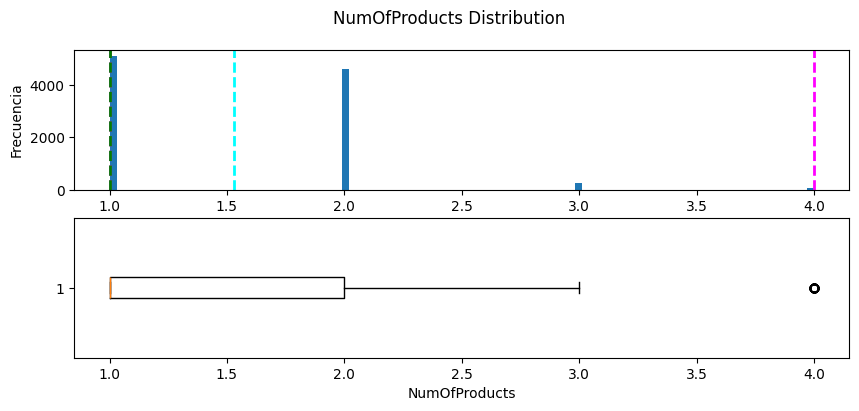

c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



 
Columna: HasCrCard
HasCrCard 
Minimum:0.00
Mean:0.71
Median:1.00
Mode:1.00
Maximum:1.00



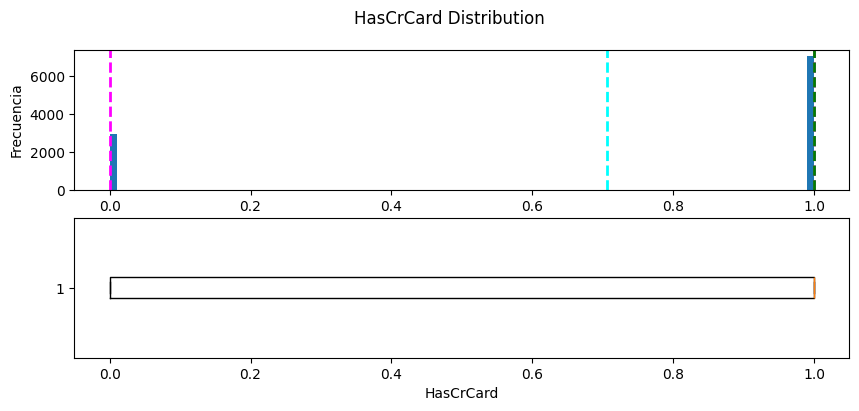

 
Columna: IsActiveMember
IsActiveMember 
Minimum:0.00
Mean:0.52
Median:1.00
Mode:1.00
Maximum:1.00



c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



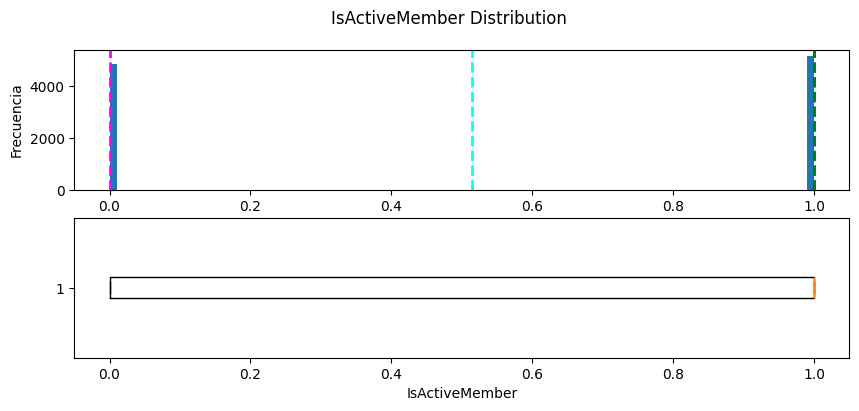

c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



 
Columna: EstimatedSalary
EstimatedSalary 
Minimum:11.58
Mean:100090.24
Median:100193.91
Mode:24924.92
Maximum:199992.48



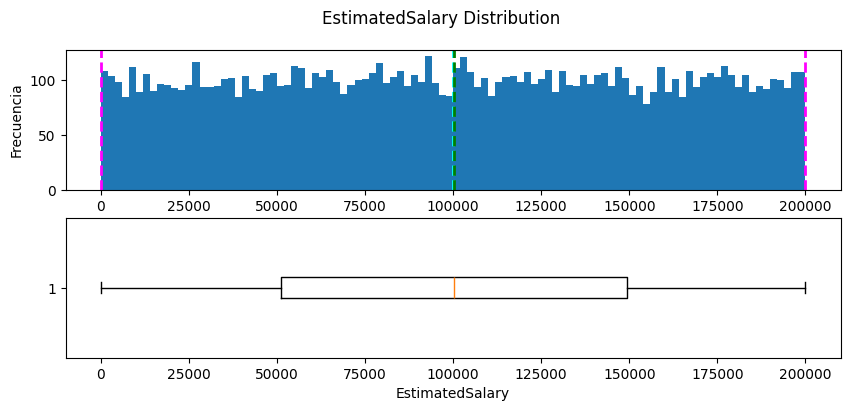

c:\Users\Ares\anaconda3\envs\MLOPS\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



 
Columna: Exited
Exited 
Minimum:0.00
Mean:0.20
Median:0.00
Mode:0.00
Maximum:1.00



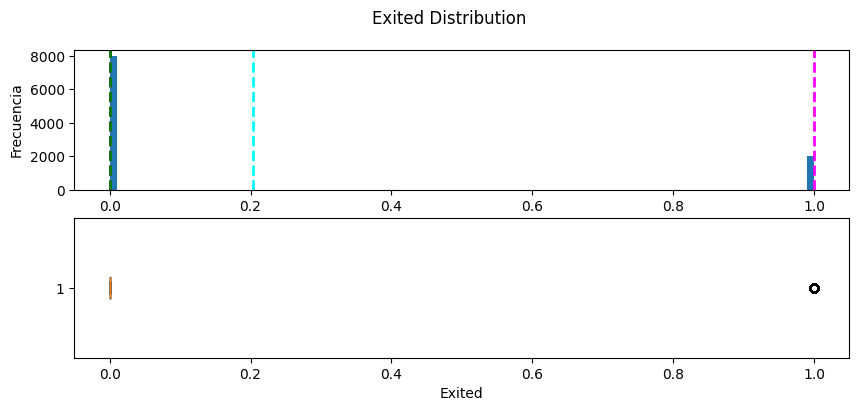

In [4]:
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        print(f'Columna: {col}')
        rg.distribution_Data(df[col])
        print(' ')

    else: 
        print(f'Columna: {col}')
        rg.histogram(df,col, show=True)
        print(' ')
    

# Analisis Multivariable

In [5]:
# Convertimos los datos en formato categorico, para más info: shorturl.at/y0269
column_equivalence = {}
features = list(df.columns)
for i, column in enumerate(list([str(d) for d in df.dtypes])):
    if column == "object":
        df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode())
        categorical_column = df[df.columns[i]].astype("category")
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())
        df[df.columns[i]] = categorical_column.cat.codes
    else:
        df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].median())

In [6]:
from tools_ml import eval_data as ev 
ev.calcular_vif(df = df)


,Variable,VIF
0,CreditScore,21.243043
1,Geography,1.817451
2,Gender,2.191102
3,Age,13.685859
4,Tenure,3.874058
5,Balance,2.678242
6,NumOfProducts,7.733164
7,HasCrCard,3.289635
8,IsActiveMember,2.151546
9,EstimatedSalary,3.886994


Tenemos tres variables que presentan valores de VIF superiores a 10 lo que indica multicolinealidad. Debemos tener este punto en cuenta para la eleccion del modelo de ml a usar

In [1]:
import logging

class MiClase:
    def __init__(self):
        logging.basicConfig(level=logging.INFO)  # Configuración global del logging
        self.logger = logging.getLogger(__name__)  # Logger para esta clase

    def ejecutar(self):
        self.logger.info("Este es un mensaje de información")
        self.logger.warning("Este es un mensaje de advertencia")
        self.logger.error("Este es un mensaje de error")

obj = MiClase()
obj.ejecutar()


INFO:__main__:Este es un mensaje de información
ERROR:__main__:Este es un mensaje de error


In [7]:
from tools_ml.eval_data import filtrar_correlaciones

filtrar_correlaciones(df, umbrales=[-0.1,1])

CreditScore      Geography          0.007888
                 Gender            -0.002857
                 Age               -0.003965
                 Tenure             0.000842
                 Balance            0.006268
                 NumOfProducts      0.012238
                 HasCrCard         -0.005458
                 IsActiveMember     0.025651
                 EstimatedSalary   -0.001384
                 Exited            -0.027094
Geography        Gender             0.004719
                 Age                0.022812
                 Tenure             0.003739
                 Balance            0.069408
                 NumOfProducts      0.003972
                 HasCrCard         -0.008523
                 IsActiveMember     0.006724
                 EstimatedSalary   -0.001369
                 Exited             0.035943
Gender           Age               -0.027544
                 Tenure             0.014733
                 Balance            0.012087
          

In [13]:
rg.multiple_histogram(df, 'Exited', 'Geography')

In [12]:
rg.box_and_whisker(df, 'Exited', 'EstimatedSalary')